✅ 环境准备完成
工作目录: d:\Vscode\stock-analysis-tool
正在导入项目模块...
✅ 分析器初始化完成
📁 数据目录:
数据目录: d:\Vscode\stock-analysis-tool\data
清洗数据: d:\Vscode\stock-analysis-tool\data\cleaned

📊 找到 4 个数据文件:
  1. 1810_cleaned.csv (83.0 KB)
  2. 700_cleaned.csv (285.7 KB)
  3. 941_cleaned.csv (355.8 KB)
  4. 9988_cleaned.csv (82.4 KB)
可用股票: ['1810', '700', '941', '9988']

🎯 分析股票: 1810
加载文件: 1810_cleaned.csv
✅ 加载成功: 1857 行数据
📅 时间范围: 2018-07-09 到 2026-01-21

📋 数据基本信息:
数据形状: (1857, 5)
列名: ['open', 'high', 'low', 'close', 'volume']

数据预览:
            open   high    low  close       volume
date                                              
2018-07-09  16.6  17.00  16.00  16.80  462182642.0
2018-07-10  17.0  19.34  17.00  19.00  534072218.0
2018-07-11  18.5  19.80  18.30  19.00  374721138.0
2018-07-12  19.4  19.70  19.02  19.26  132592630.0
2018-07-13  19.6  21.80  19.52  21.45  364065075.0

📊 基本统计:
收盘价统计:
  最小值: 8.35
  最大值: 60.15
  平均值: 20.47
  最新值: 35.42
  总收益率: 110.83%

🔧 计算技术指标...

📈 技术指标预览:
  MA_5: 36.4680
  MA_10

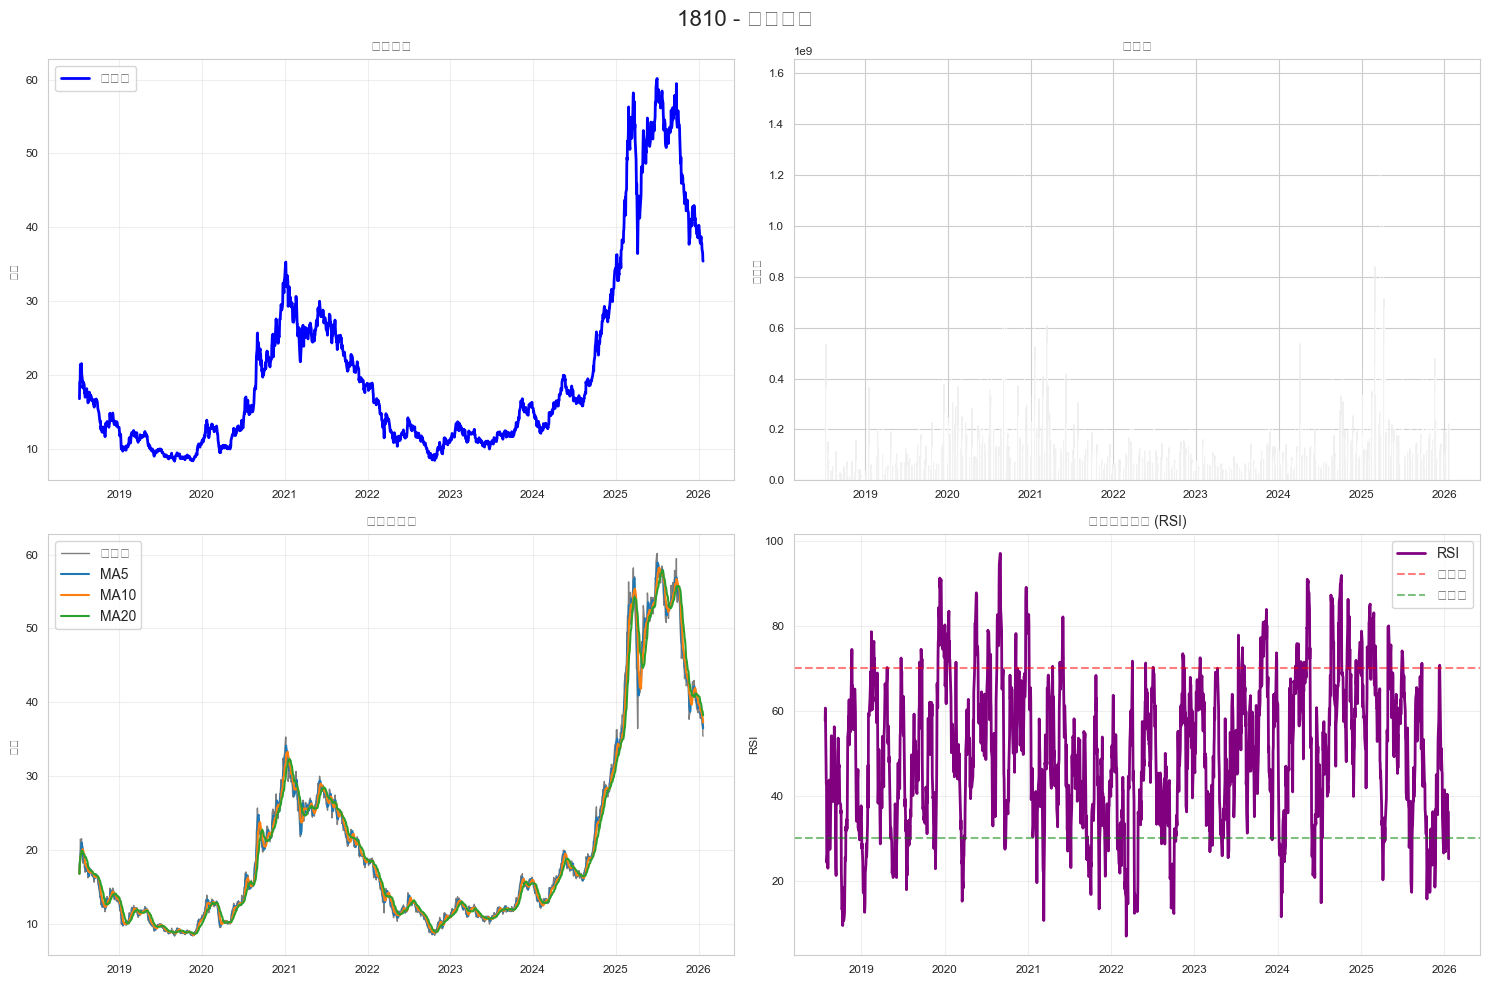

✅ 分析完成
🔍 数据质量检查...

📋 数据质量报告:
✅ 数据质量良好

📊 数据统计:
  数据行数: 1857
  数据列数: 5
  时间范围: 2018-07-09 到 2026-01-21
🎉 项目演示完成

项目功能总结:
  1. 多源股票数据获取
  2. 数据清洗和预处理
  3. 技术指标计算 (MA, RSI, MACD, 布林带)
  4. 数据可视化分析
  5. 数据质量检查

💡 后续步骤:
  • 运行 src/data_fetcher_akshare.py 获取更多数据
  • 运行 src/data_cleaner.py 清洗数据
  • 查看 02_技术分析.ipynb 进行更深入分析

--- 演示结束 ---


In [8]:
# %% [markdown]
# # 📊 股票分析工具 - 项目演示
# 
# **项目作者**: Joey
# **版本**: 1.0.0  
# 
# ## 项目概述
# 这是一个股票数据分析工具，包含数据获取、清洗、技术分析和可视化功能。
# 
# ---

# %%
# 基础库导入
import sys
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 添加项目路径
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# 数据科学库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 设置图表样式
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("✅ 环境准备完成")
print(f"工作目录: {project_root}")

# %% [markdown]
# ## 2. 项目模块导入

# %%
print("正在导入项目模块...")

# 定义兼容的StockAnalyzer类
class SimpleStockAnalyzer:
    """简化版股票分析器"""
    def __init__(self):
        self.project_root = project_root
        self.data_dir = project_root / "data"
        self.cleaned_dir = self.data_dir / "cleaned"
        
    def get_available_stocks(self):
        """获取可用股票列表"""
        if not self.cleaned_dir.exists():
            return []
        
        files = list(self.cleaned_dir.glob("*.csv"))
        tickers = []
        for f in files:
            # 提取股票代码
            name = f.stem
            # 处理各种文件名格式
            if '_cleaned' in name:
                ticker = name.replace('_cleaned', '')
            elif 'CLEANED_' in name:
                ticker = name.replace('CLEANED_', '').split('_')[0]
            else:
                # 尝试提取数字代码
                import re
                numbers = re.findall(r'\d+', name)
                ticker = numbers[0] if numbers else name[:6]
            tickers.append(ticker)
        
        return sorted(list(set(tickers)))
    
    def load_stock_data(self, ticker):
        """加载股票数据"""
        if not self.cleaned_dir.exists():
            print(f"目录不存在: {self.cleaned_dir}")
            return None
        
        # 查找文件
        found_files = []
        for file in self.cleaned_dir.glob("*.csv"):
            filename = file.stem
            if ticker in filename or filename.replace('_cleaned', '') == ticker:
                found_files.append(file)
        
        if not found_files:
            print(f"未找到 {ticker} 的数据文件")
            # 显示可用文件
            print("可用文件:")
            for f in list(self.cleaned_dir.glob("*.csv"))[:5]:
                print(f"  - {f.name}")
            return None
        
        # 使用第一个匹配的文件
        filepath = found_files[0]
        print(f"加载文件: {filepath.name}")
        
        try:
            # 读取CSV
            df = pd.read_csv(filepath)
            
            # 查找日期列
            date_col = None
            for col in ['date', 'Date', 'datetime', '日期']:
                if col in df.columns:
                    date_col = col
                    break
            
            # 设置索引
            if date_col:
                df[date_col] = pd.to_datetime(df[date_col])
                df.set_index(date_col, inplace=True)
            elif df.index.name in ['date', 'Date']:
                df.index = pd.to_datetime(df.index)
            
            # 标准化列名
            column_mapping = {
                '收盘价': 'close', 'Close': 'close', '收盘': 'close',
                '开盘价': 'open', 'Open': 'open', '开盘': 'open',
                '最高价': 'high', 'High': 'high', '最高': 'high',
                '最低价': 'low', 'Low': 'low', '最低': 'low',
                '成交量': 'volume', 'Volume': 'volume'
            }
            
            # 只重命名存在的列
            for old_name, new_name in column_mapping.items():
                if old_name in df.columns and new_name not in df.columns:
                    df.rename(columns={old_name: new_name}, inplace=True)
            
            print(f"✅ 加载成功: {len(df)} 行数据")
            if hasattr(df.index, 'min'):
                print(f"📅 时间范围: {df.index.min().date()} 到 {df.index.max().date()}")
            
            return df
            
        except Exception as e:
            print(f"❌ 加载失败: {e}")
            return None
    
    def calculate_moving_averages(self, df, periods=[5, 10, 20, 50]):
        """计算移动平均线"""
        result = df.copy()
        
        if 'close' not in result.columns:
            print("缺少close列，无法计算移动平均线")
            return result
        
        for period in periods:
            col_name = f'MA_{period}'
            result[col_name] = result['close'].rolling(window=period, min_periods=1).mean()
        
        return result
    
    def calculate_rsi(self, df, period=14):
        """计算RSI"""
        result = df.copy()
        
        if 'close' not in result.columns:
            print("缺少close列，无法计算RSI")
            return result
        
        delta = result['close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        result[f'RSI_{period}'] = 100 - (100 / (1 + rs))
        
        return result
    
    def calculate_macd(self, df, fast=12, slow=26, signal=9):
        """计算MACD"""
        result = df.copy()
        
        if 'close' not in result.columns:
            print("缺少close列，无法计算MACD")
            return result
        
        # 计算EMA
        ema_fast = result['close'].ewm(span=fast, adjust=False).mean()
        ema_slow = result['close'].ewm(span=slow, adjust=False).mean()
        
        # MACD线
        result['MACD'] = ema_fast - ema_slow
        result['MACD_Signal'] = result['MACD'].ewm(span=signal, adjust=False).mean()
        result['MACD_Hist'] = result['MACD'] - result['MACD_Signal']
        
        return result
    
    def calculate_bollinger_bands(self, df, period=20, std_dev=2):
        """计算布林带"""
        result = df.copy()
        
        if 'close' not in result.columns:
            print("缺少close列，无法计算布林带")
            return result
        
        result['BB_Middle'] = result['close'].rolling(window=period).mean()
        rolling_std = result['close'].rolling(window=period).std()
        result['BB_Upper'] = result['BB_Middle'] + (rolling_std * std_dev)
        result['BB_Lower'] = result['BB_Middle'] - (rolling_std * std_dev)
        
        return result

# 创建分析器实例
analyzer = SimpleStockAnalyzer()
print("✅ 分析器初始化完成")

# %% [markdown]
# ## 3. 查看可用数据

# %%
# 检查数据目录
data_dir = project_root / "data"
cleaned_dir = data_dir / "cleaned"

print("📁 数据目录:")
print(f"数据目录: {data_dir}")
print(f"清洗数据: {cleaned_dir}")

if cleaned_dir.exists():
    cleaned_files = list(cleaned_dir.glob("*.csv"))
    print(f"\n📊 找到 {len(cleaned_files)} 个数据文件:")
    
    for i, file in enumerate(cleaned_files[:10], 1):
        file_size = file.stat().st_size / 1024
        print(f"  {i}. {file.name} ({file_size:.1f} KB)")
    
    if len(cleaned_files) > 10:
        print(f"  ... 还有 {len(cleaned_files) - 10} 个文件")
else:
    print("❌ 清洗数据目录不存在")
    print("请先运行: python src/data_cleaner.py")

# %% [markdown]
# ## 4. 加载并分析单只股票

# %%
# 获取可用股票
available_stocks = analyzer.get_available_stocks()
print(f"可用股票: {available_stocks}")

if available_stocks:
    # 使用第一只股票
    ticker = available_stocks[0]
    print(f"\n🎯 分析股票: {ticker}")
    
    # 加载数据
    df = analyzer.load_stock_data(ticker)
    
    if df is not None and not df.empty:
        # 显示基本信息
        print("\n📋 数据基本信息:")
        print(f"数据形状: {df.shape}")
        print(f"列名: {list(df.columns)}")
        
        # 显示前几行
        print("\n数据预览:")
        print(df.head())
        
        # 显示统计信息
        print("\n📊 基本统计:")
        if 'close' in df.columns:
            print(f"收盘价统计:")
            print(f"  最小值: {df['close'].min():.2f}")
            print(f"  最大值: {df['close'].max():.2f}")
            print(f"  平均值: {df['close'].mean():.2f}")
            print(f"  最新值: {df['close'].iloc[-1]:.2f}")
            
            # 计算收益率
            if len(df) > 1:
                total_return = (df['close'].iloc[-1] / df['close'].iloc[0] - 1) * 100
                print(f"  总收益率: {total_return:.2f}%")
        else:
            print("⚠️  数据中没有close列")
            print("可用列:", list(df.columns))
        
        # 计算技术指标
        print("\n🔧 计算技术指标...")
        df_with_indicators = df.copy()
        
        # 移动平均线
        df_with_indicators = analyzer.calculate_moving_averages(df_with_indicators)
        
        # RSI
        df_with_indicators = analyzer.calculate_rsi(df_with_indicators)
        
        # MACD（如果数据足够）
        if len(df) >= 26:
            df_with_indicators = analyzer.calculate_macd(df_with_indicators)
        
        # 布林带（如果数据足够）
        if len(df) >= 20:
            df_with_indicators = analyzer.calculate_bollinger_bands(df_with_indicators)
        
        # 显示技术指标
        print("\n📈 技术指标预览:")
        indicator_cols = [col for col in df_with_indicators.columns 
                         if any(x in col for x in ['MA_', 'RSI', 'MACD', 'BB_'])]
        
        if indicator_cols:
            for col in indicator_cols:
                print(f"  {col}: {df_with_indicators[col].iloc[-1]:.4f}")
        else:
            print("  未计算技术指标")
        
        # 可视化
        print("\n📊 生成图表...")
        
        # 创建图表
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'{ticker} - 技术分析', fontsize=16)
        
        # 1. 价格走势
        ax1 = axes[0, 0]
        if 'close' in df.columns:
            ax1.plot(df.index, df['close'], label='收盘价', linewidth=2, color='blue')
            ax1.set_title('价格走势')
            ax1.set_ylabel('价格')
            ax1.grid(True, alpha=0.3)
            ax1.legend()
        
        # 2. 成交量
        ax2 = axes[0, 1]
        if 'volume' in df.columns:
            ax2.bar(df.index, df['volume'], alpha=0.6, color='gray')
            ax2.set_title('成交量')
            ax2.set_ylabel('成交量')
        
        # 3. 移动平均线
        ax3 = axes[1, 0]
        if 'close' in df.columns:
            ax3.plot(df.index, df['close'], label='收盘价', linewidth=1, color='black', alpha=0.5)
            
            # 添加移动平均线
            for period in [5, 10, 20]:
                ma_col = f'MA_{period}'
                if ma_col in df_with_indicators.columns:
                    ax3.plot(df_with_indicators.index, df_with_indicators[ma_col], 
                            label=f'MA{period}', linewidth=1.5)
            
            ax3.set_title('移动平均线')
            ax3.set_ylabel('价格')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
        
        # 4. RSI
        ax4 = axes[1, 1]
        rsi_cols = [col for col in df_with_indicators.columns if 'RSI' in col]
        if rsi_cols:
            rsi_col = rsi_cols[0]
            ax4.plot(df_with_indicators.index, df_with_indicators[rsi_col], 
                    label='RSI', linewidth=2, color='purple')
            ax4.axhline(y=70, color='red', linestyle='--', alpha=0.5, label='超买线')
            ax4.axhline(y=30, color='green', linestyle='--', alpha=0.5, label='超卖线')
            ax4.set_title('相对强弱指数 (RSI)')
            ax4.set_ylabel('RSI')
            ax4.legend()
            ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("✅ 分析完成")
        
    else:
        print(f"❌ 无法加载 {ticker} 的数据")
else:
    print("❌ 没有可用股票数据")
    print("请先运行数据获取和清洗流程")

# %% [markdown]
# ## 5. 数据质量检查

# %%
if 'df' in locals() and df is not None:
    print("🔍 数据质量检查...")
    
    # 简单数据质量检查
    issues = []
    
    # 检查缺失值
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    
    if total_missing > 0:
        issues.append(f"发现 {total_missing} 个缺失值")
        print("缺失值统计:")
        for col, count in missing_values[missing_values > 0].items():
            print(f"  {col}: {count} 个")
    
    # 检查重复日期
    duplicate_dates = df.index.duplicated().sum()
    if duplicate_dates > 0:
        issues.append(f"发现 {duplicate_dates} 个重复日期")
    
    # 检查价格合理性
    if 'close' in df.columns:
        negative_prices = (df['close'] <= 0).sum()
        if negative_prices > 0:
            issues.append(f"发现 {negative_prices} 个非正价格")
    
    # 检查成交量
    if 'volume' in df.columns:
        negative_volume = (df['volume'] < 0).sum()
        if negative_volume > 0:
            issues.append(f"发现 {negative_volume} 个负成交量")
    
    # 输出结果
    print("\n📋 数据质量报告:")
    if issues:
        print("⚠️  发现问题:")
        for i, issue in enumerate(issues, 1):
            print(f"  {i}. {issue}")
    else:
        print("✅ 数据质量良好")
    
    print(f"\n📊 数据统计:")
    print(f"  数据行数: {len(df)}")
    print(f"  数据列数: {len(df.columns)}")
    if hasattr(df.index, 'min'):
        print(f"  时间范围: {df.index.min().date()} 到 {df.index.max().date()}")

# %% [markdown]
# ## 6. 项目总结

# %%
print("🎉 项目演示完成")
print("="*50)

print("\n项目功能总结:")
features = [
    "1. 多源股票数据获取",
    "2. 数据清洗和预处理", 
    "3. 技术指标计算 (MA, RSI, MACD, 布林带)",
    "4. 数据可视化分析",
    "5. 数据质量检查"
]

for feature in features:
    print(f"  {feature}")

print("\n💡 后续步骤:")
steps = [
    "• 运行 src/data_fetcher_akshare.py 获取更多数据",
    "• 运行 src/data_cleaner.py 清洗数据",
    "• 查看 02_技术分析.ipynb 进行更深入分析"
]

for step in steps:
    print(f"  {step}")

print("\n--- 演示结束 ---")